In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

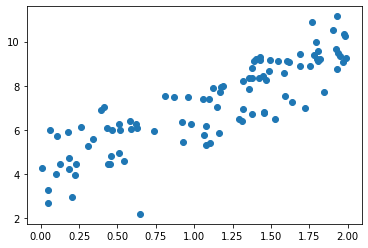

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
X_b[:5]

array([[1.        , 0.62506688],
       [1.        , 1.54459638],
       [1.        , 0.30518296],
       [1.        , 0.64695823],
       [1.        , 1.99249547]])

In [6]:
theta_best

array([[4.07093332],
       [2.80516415]])

In [7]:
# Make predict with theta best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07093332],
       [9.68126163]])

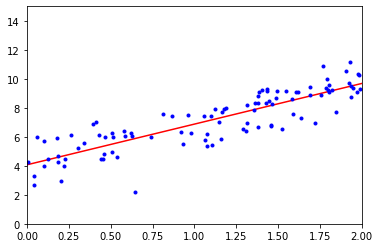

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent code using Scikit-Learn looks like this

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07093332]), array([[2.80516415]]))

In [10]:
lin_reg.predict(X_new)

array([[4.07093332],
       [9.68126163]])

## **Gradient Descent**

In [11]:
learning_rate = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2,1) # random initialization
for iteration in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate*gradient
theta

array([[4.07093332],
       [2.80516415]])

In [12]:
# Result 
X_new_b.dot(theta)

array([[4.07093332],
       [9.68126163]])

## Stochastic Gradient Descent

In [14]:
m=len(X_b)
theta_path_sgd =[]
np.random.seed(42)

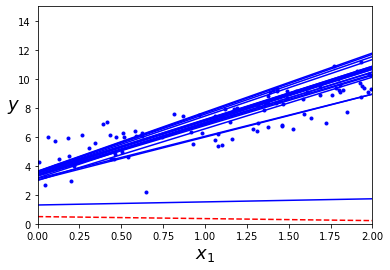

In [16]:
from matplotlib import style


n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,"b. ")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show() 

In [17]:
theta

array([[4.04893809],
       [2.80847482]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06436481]), array([2.82203386]))

### Mini-batch Gradient Descent